In [2]:
##import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'y')

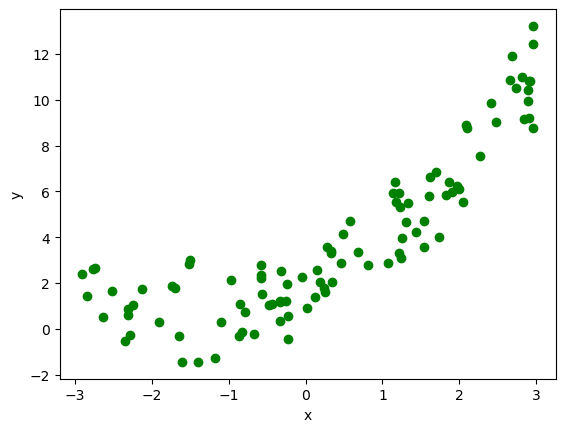

In [5]:
x = 6* np.random.rand(100,1)-3
y= 0.5* x**2 + 1.5*x + 2 +np.random.randn(100,1)
plt.scatter(x,y,color = 'g')
plt.xlabel('x')
plt.ylabel('y')

In [6]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [7]:
from sklearn.linear_model import LinearRegression
l_regression = LinearRegression()

In [8]:
l_regression.fit(x_train, y_train)

LinearRegression()

In [11]:
from sklearn.metrics import r2_score
score_L = r2_score(y_test,l_regression.predict(x_test))
print(score_L)

0.7471725583773341


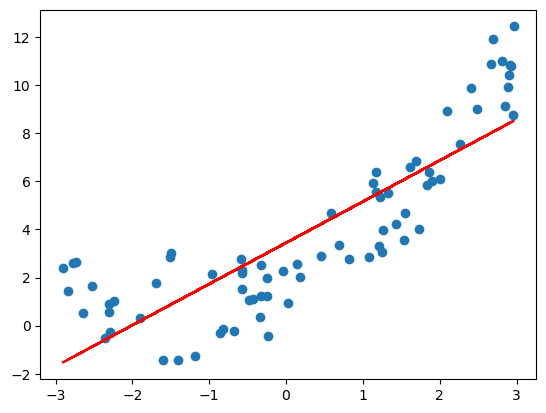

In [14]:
plt.plot(x_train,l_regression.predict(x_train),color='r')
plt.scatter(x_train,y_train)

In [15]:
#polynomial transformation
from sklearn.preprocessing import PolynomialFeatures

In [16]:
poly = PolynomialFeatures(degree=2,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)


In [17]:
x_train_poly

array([[ 1.00000000e+00,  2.95502408e+00,  8.73216729e+00],
       [ 1.00000000e+00,  2.69068251e+00,  7.23977239e+00],
       [ 1.00000000e+00, -5.82300740e-01,  3.39074152e-01],
       [ 1.00000000e+00,  1.22730253e+00,  1.50627149e+00],
       [ 1.00000000e+00,  1.45361070e-01,  2.11298406e-02],
       [ 1.00000000e+00,  6.86737238e-01,  4.71608034e-01],
       [ 1.00000000e+00, -1.51178968e+00,  2.28550803e+00],
       [ 1.00000000e+00,  1.13124789e+00,  1.27972179e+00],
       [ 1.00000000e+00, -1.60506058e+00,  2.57621947e+00],
       [ 1.00000000e+00,  1.16784774e+00,  1.36386835e+00],
       [ 1.00000000e+00,  1.83373552e+00,  3.36258597e+00],
       [ 1.00000000e+00,  2.84581519e+00,  8.09866412e+00],
       [ 1.00000000e+00,  1.73195692e+00,  2.99967478e+00],
       [ 1.00000000e+00, -6.76214124e-01,  4.57265542e-01],
       [ 1.00000000e+00, -1.69374109e+00,  2.86875889e+00],
       [ 1.00000000e+00,  2.92171607e+00,  8.53642482e+00],
       [ 1.00000000e+00,  2.81203170e+00

In [18]:
regression = LinearRegression()
regression.fit(x_train_poly, y_train)
y_pred = regression.predict(x_test_poly)
score_P = r2_score(y_test,y_pred)
print(score_P)

0.9119832898873985


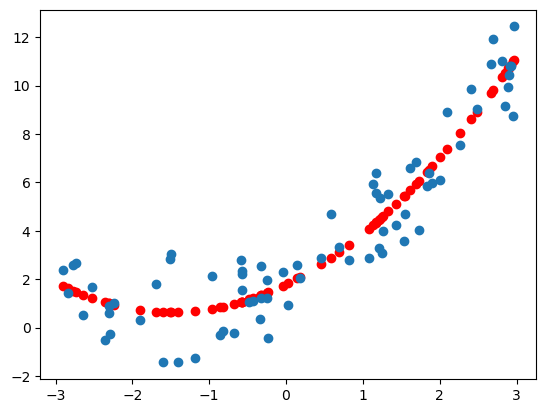

In [21]:
plt.scatter(x_train,regression.predict(x_train_poly),color='r')
plt.scatter(x_train,y_train)

In [38]:
poly = PolynomialFeatures(degree=4,include_bias=True)
x_train_poly = poly.fit_transform(x_train)
x_test_poly = poly.transform(x_test)

In [39]:
regression = LinearRegression()
regression.fit(x_train_poly, y_train)
y_pred = regression.predict(x_test_poly)
score_P = r2_score(y_test,y_pred)
print(score_P)

0.9129617970166193


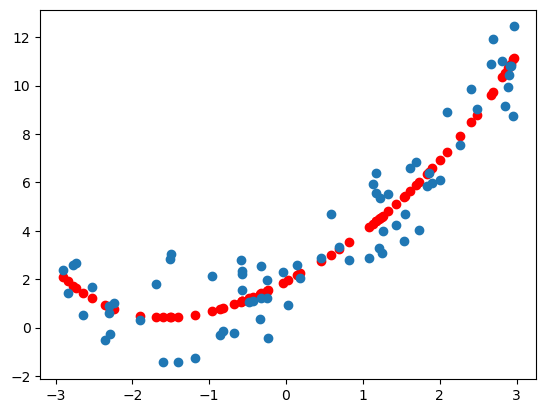

In [40]:
plt.scatter(x_train,regression.predict(x_train_poly),color='r')
plt.scatter(x_train,y_train)

In [42]:
# prediction of new data set
x_new = np.linspace(-3,3,200).reshape(200,1)
x_new_poly = poly.transform(x_new)
x_new_poly

array([[ 1.00000000e+00, -3.00000000e+00,  9.00000000e+00,
        -2.70000000e+01,  8.10000000e+01],
       [ 1.00000000e+00, -2.96984925e+00,  8.82000455e+00,
        -2.61940839e+01,  7.77924802e+01],
       [ 1.00000000e+00, -2.93969849e+00,  8.64182723e+00,
        -2.54043665e+01,  7.46811778e+01],
       [ 1.00000000e+00, -2.90954774e+00,  8.46546804e+00,
        -2.46306834e+01,  7.16641492e+01],
       [ 1.00000000e+00, -2.87939698e+00,  8.29092700e+00,
        -2.38728702e+01,  6.87394705e+01],
       [ 1.00000000e+00, -2.84924623e+00,  8.11820409e+00,
        -2.31307624e+01,  6.59052376e+01],
       [ 1.00000000e+00, -2.81909548e+00,  7.94729931e+00,
        -2.24041955e+01,  6.31595663e+01],
       [ 1.00000000e+00, -2.78894472e+00,  7.77821267e+00,
        -2.16930052e+01,  6.05005924e+01],
       [ 1.00000000e+00, -2.75879397e+00,  7.61094417e+00,
        -2.09970269e+01,  5.79264711e+01],
       [ 1.00000000e+00, -2.72864322e+00,  7.44549380e+00,
        -2.03160961e+01

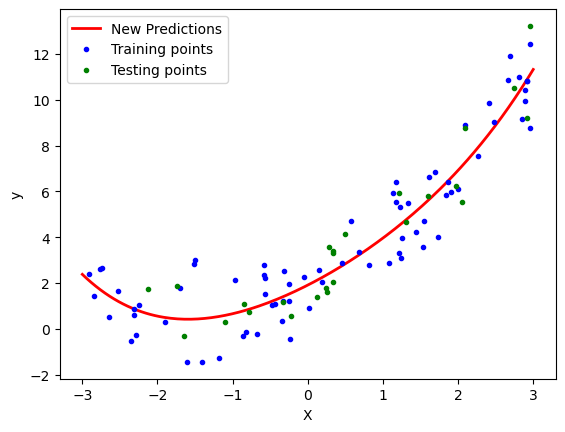

In [45]:
y_new = regression.predict(x_new_poly)
plt.plot(x_new, y_new, "r-", linewidth=2, label="New Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

In [46]:
from sklearn.pipeline import Pipeline

In [49]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(x_train,y_train) ## ploynomial and fit of linear reression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(x_train, y_train, "b.", linewidth=3)
    plt.plot(x_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()

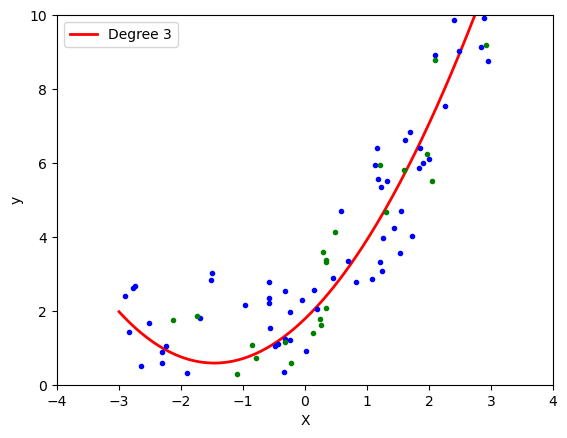

In [53]:
poly_regression(3)